# Tarea 8.1

¿Entrenar con más caracteristicas y con base a las probabilidades y dado un input definir a que clase pertenece: 'versicolor', 'virginica' ?

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

In [ ]:
X = iris["data"]
Y = iris["target"]
names_features = iris["feature_names"]
names_target = iris["feature_names"]
df = pd.DataFrame(X, columns=names_features)

columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols= [col.replace(")" ,"") for col in columns_name ]

df.columns=cols
df["Target"]=Y
df

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for trainIndex, testIndex in split.split(df, df["Target"]):
    stratTrainSet = df.loc[trainIndex]
    stratTestSet = df.loc[testIndex]

dftrain = stratTrainSet
dftest = stratTestSet

Setosa

In [ ]:
y_train = (dftrain['Target'] == 0).astype(float)
X_train = dftrain.iloc[:,0:4].values

y_test = (dftest['Target'] == 0).astype(float)
X_test = dftest.iloc[:,0:4].values

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

1.0
1.0


Versicolor

In [ ]:
y_train = (dftrain['Target'] == 1).astype(float)
X_train = dftrain.iloc[:,0:4].values

y_test = (dftest['Target'] == 1).astype(float)
X_test = dftest.iloc[:,0:4].values

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

0.725
0.7


Virginica

In [ ]:
y_train = (dftrain['Target'] == 2).astype(float)
X_train = dftrain.iloc[:,0:4].values

y_test = (dftest['Target'] == 2).astype(float)
X_test = dftest.iloc[:,0:4].values

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

0.975
0.9666666666666667


Por ejemplo dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?

In [ ]:
Y_train = dftrain['Target'].values
X_train = dftrain.iloc[:, 0:4].values

X = [[4.9,5.0, 1.8, 0.3]]

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
prob = log_reg.predict_proba(X)
prob #Vemos que pertenece a la clase 0, es decir a Setosa

array([[9.92147316e-01, 7.85262185e-03, 6.17280999e-08]])

# Tarea 8.2

1. Entrenar el modelo anterior para un numero mayor de caracteristicas

In [ ]:
y_train = dftrain['Target']
X_train = dftrain.iloc[:,0:4].values

y_test = dftest['Target']
X_test = dftest.iloc[:,0:4].values

In [ ]:
softmax_reg = LogisticRegression(solver="lbfgs", \
                                 C=10, random_state=42)
softmax_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, random_state=42)

In [ ]:
print(softmax_reg.score(X_test,y_test))

1.0


2. Analizar que pasa con la regularaización.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

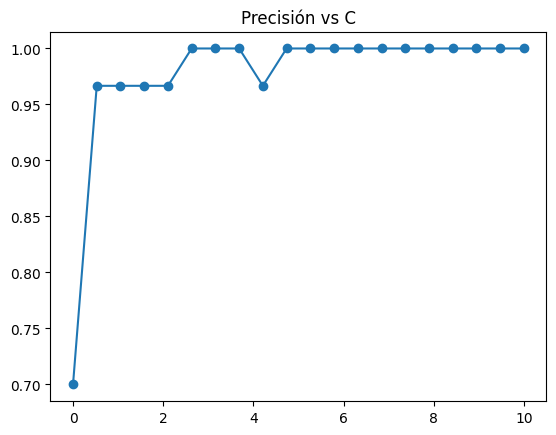

In [ ]:
c_reg = np.linspace(0.0001,10,20)
reg_list = []
for C1 in c_reg:
  softmax_reg = LogisticRegression(solver="lbfgs", \
                                 C=C1, random_state=42)
  softmax_reg.fit(X_train, y_train)
  l = softmax_reg.score(X_test,y_test)
  reg_list.append(l)

plt.plot(c_reg,reg_list, marker='o')
plt.title('Precisión vs C')
plt.show()

3. Hacer una analisis de las metricas, construir curvas de aprendizaje para todo el conjunto de datos

In [ ]:
y_pred = softmax_reg.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Matriz de confusión:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


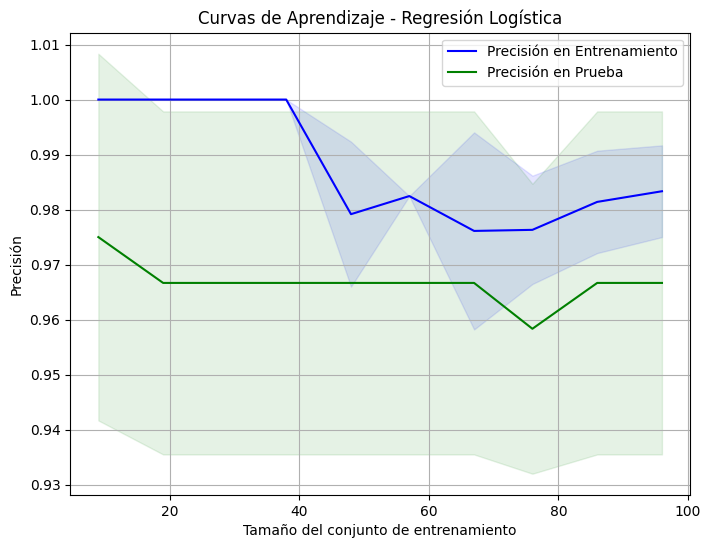

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    softmax_reg,
    X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calcular la media y desviación estándar para los gráficos
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas de aprendizaje
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Precisión en Entrenamiento", color="blue")
plt.plot(train_sizes, test_mean, label="Precisión en Prueba", color="green")

# Rellenar las áreas de las desviaciones estándar
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

# Etiquetas y título
plt.title("Curvas de Aprendizaje - Regresión Logística")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.grid(True)
plt.show()


4. Con base en el libro Hand on Machine learning, constrnuir las fronteras de desición para este multiclasificador.

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

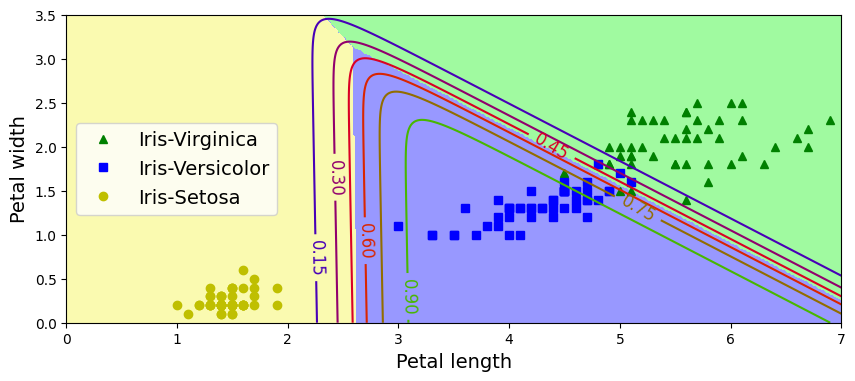

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()